In [1]:
# Se importan las librerias necesarias y seleccionan los estilos para los graficos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')
sns.set_theme(style='whitegrid')

In [2]:
# Se cargan todas las hojas del dataset principal
Internet = pd.read_excel("datasets/Internet.xlsx", sheet_name=None)

In [3]:
# Se asignan las hojas relevantes a dataframes
df_vel_porc_prov = Internet['Velocidad % por prov'] 
df_acc_tec = Internet['Accesos Por Tecnología'] 

df_pen_pob = Internet['Penetración-poblacion']
df_pen_hog = Internet['Penetracion-hogares']

df_acc_rango = Internet['Accesos por rangos']
df_ingresos = Internet['Ingresos ']

# EDA - Velocidad % por prov

Este dataset contiene informacion sobre la evolucion historica de la velocidad media de conexion (Mbps) de cada provincia de Argentina, medida desde el primer trimestre de 2014 hasta el segundo trimestre de 2024

In [8]:
# Se observa informacion sobre el dataframe
df_vel_porc_prov = Internet['Velocidad % por prov']
df_vel_porc_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


In [9]:
df_vel_porc_prov.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38


In [10]:
# Se ordena el dataframe y reinician los indices
df_vel_porc_prov= df_vel_porc_prov.sort_values(by=["Año", "Trimestre"], ascending=[True, True]).reset_index(drop=True)

In [11]:
df_vel_porc_prov.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2014,1,Buenos Aires,3.733133
1,2014,1,Capital Federal,4.024082
2,2014,1,Catamarca,2.802734


Se grafica el conjunto entero de datos para tener una representacion completa de la evolucion de las provincias en todo el periodo de tiempo

En el grafico se pueden observar dos cosas:

- Las velocidades de conexion entre provincias muestran una gran dispersión en cada trimestre. Esto indica diferencias significativas en la calidad de servicio entre distintas provincias, lo cual puede reflejar desigualdades en el acceso a infraestructura de Internet de alta velocidad. Esta variabilidad se va acrecentando cada vez mas

- Tambien es posible observar que a lo largo del tiempo todos los valores aumentan (con diferente ritmo). Esto muestra que para todo el pais la velocidad de conexion media a ido mejorando a lo largo del tiempo

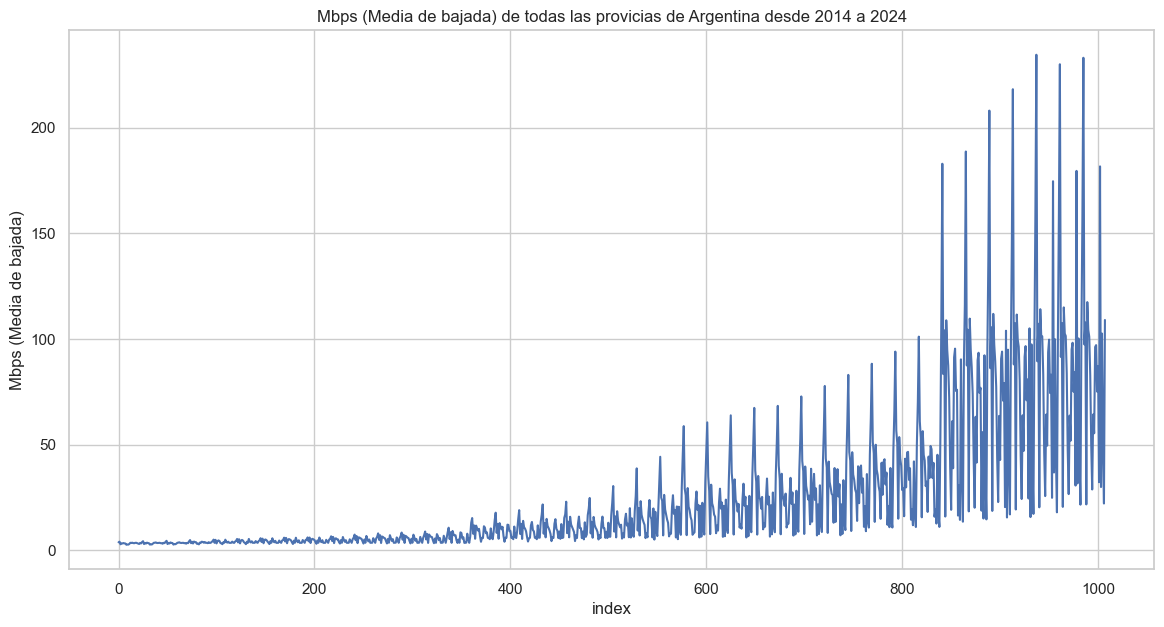

In [19]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_vel_porc_prov, x = df_vel_porc_prov.index , y="Mbps (Media de bajada)")
plt.title("Mbps (Media de bajada) de todas las provicias de Argentina desde 2014 a 2024")
plt.xlabel("index")
plt.ylabel("Mbps (Media de bajada)")
plt.show()

In [16]:
# Se agrega la columna 'Promedio Nacional' para visualizar el comportamiento de la velocidad promedio de todas las provincias
df_vel_porc_prov['Promedio Nacional'] = df_vel_porc_prov.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].transform('mean')

In [17]:
df_vel_porc_prov.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada),Promedio Nacional
0,2014,1,Buenos Aires,3.733133,3.241284
1,2014,1,Capital Federal,4.024082,3.241284
2,2014,1,Catamarca,2.802734,3.241284


Para tener mas detalle del comportamiento general para el pais, se grafica el promedio de la velocidad media de conexion de todas las provincias

- La línea roja que representa el promedio nacional sigue un patrón de escalones debido a su naturaleza trimestral. Este promedio muestra un crecimiento más estable y menos fluctuante que las velocidades de las provincias individuales. La estabilidad del promedio nacional indica que, aunque existen variaciones entre provincias, el rendimiento general del país ha mejorado de manera consistente.

- A partir del índice 850 (anio 2022), se observa un aumento significativo tanto en las velocidades individuales como en el promedio nacional. Este cambio podría estar asociado a políticas de inversión en tecnología o expansiones en la infraestructura de telecomunicaciones.


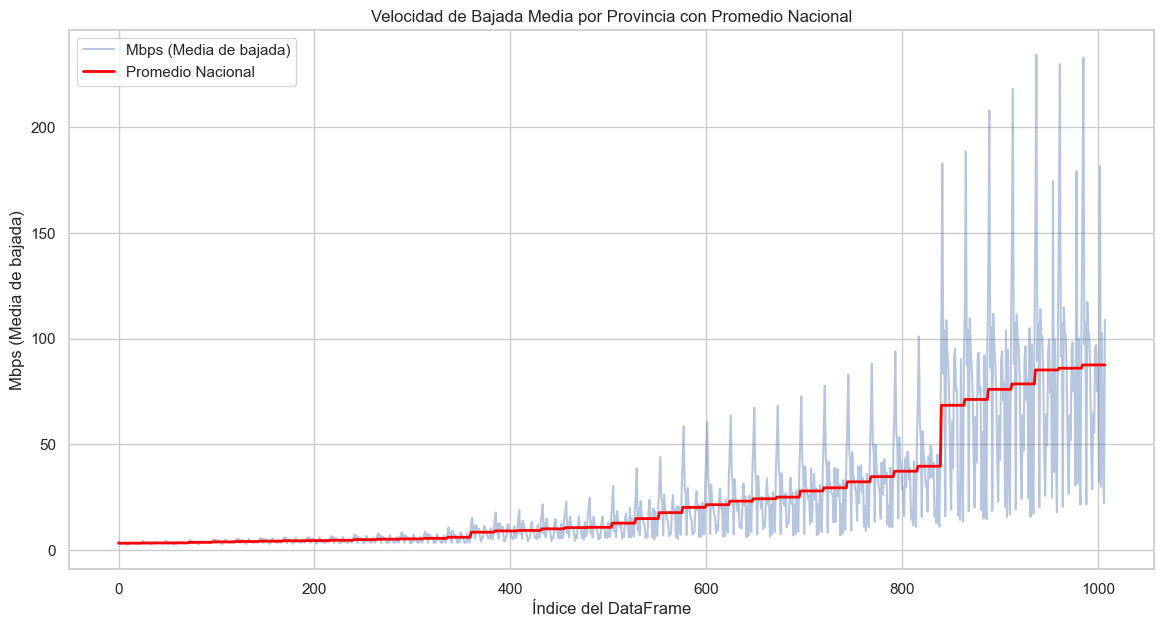

In [26]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_vel_porc_prov, x=df_vel_porc_prov.index, y='Mbps (Media de bajada)', label='Mbps (Media de bajada)', alpha=0.4)
sns.lineplot(data=df_vel_porc_prov, x=df_vel_porc_prov.index, y='Promedio Nacional', label='Promedio Nacional', color='red', linewidth=2)

plt.xlabel("Índice del DataFrame")
plt.ylabel("Mbps (Media de bajada)")
plt.title("Velocidad de Bajada Media por Provincia con Promedio Nacional")
plt.legend()
plt.show()

Se realiza un grafico para tener mas detalle de como ha ido evolucionando la dispersion de las velocidades media de las provincias con respecto a la media nacional

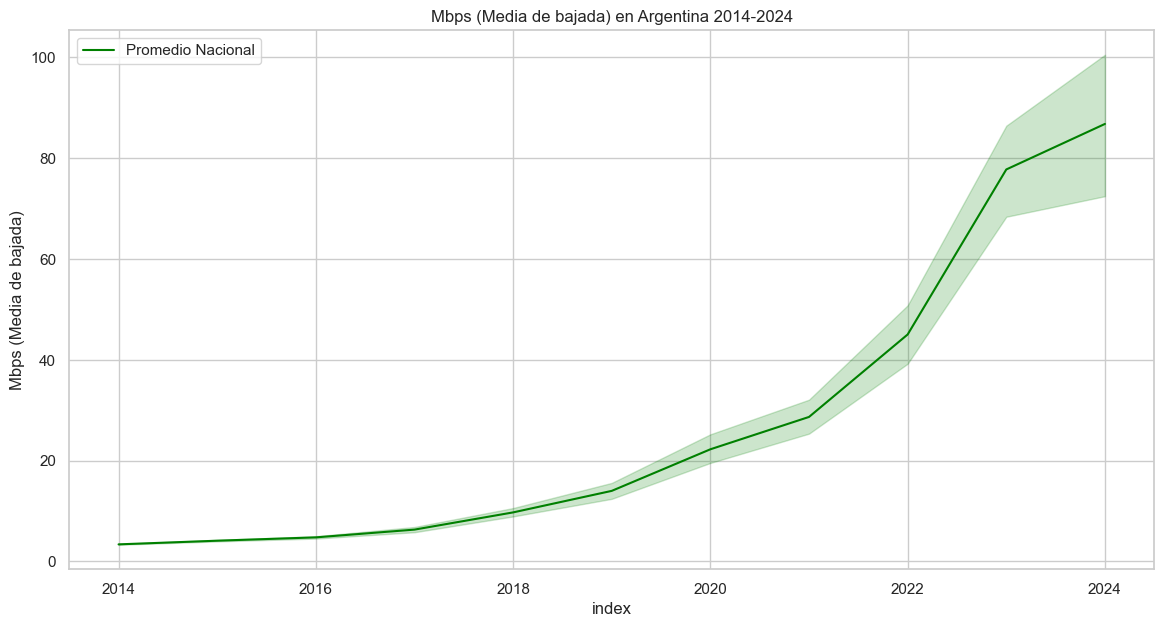

In [27]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_vel_porc_prov, x = "Año", y="Mbps (Media de bajada)", label="Promedio Nacional", color='green')
plt.title("Mbps (Media de bajada) en Argentina 2014-2024")
plt.xlabel("index")
plt.ylabel("Mbps (Media de bajada)")
plt.show()

A continuacion se obtienen cuales son las 3 provincias con mejor y peor velocidad media de internet en el segundo trimestre de 2024

In [32]:
# Filtrar por el segundo trimestre del año 2024
df_filtrado = df_vel_porc_prov[(df_vel_porc_prov["Año"] == 2024) & (df_vel_porc_prov["Trimestre"] == 2)]

top_3 = df_filtrado.nlargest(3, "Mbps (Media de bajada)") # Obtener las 3 provincias con mayor Mbps
bottom_3 = df_filtrado.nsmallest(3, "Mbps (Media de bajada)") # Obtener las 3 provincias con menor Mbps

In [33]:
top_3

,Año,Trimestre,Provincia,Mbps (Media de bajada),Promedio Nacional
985,2024,2,Capital Federal,233.01,87.5875
1002,2024,2,San Luis,181.61,87.5875
984,2024,2,Buenos Aires,157.41,87.5875


In [34]:
bottom_3

,Año,Trimestre,Provincia,Mbps (Media de bajada),Promedio Nacional
988,2024,2,Chubut,21.67,87.5875
1006,2024,2,Tierra Del Fuego,22.09,87.5875
994,2024,2,La Pampa,28.73,87.5875


Al observar las provincias con mayor y menor velocidad de internet se puede ver que las empresas proveedoras de servicios priorizan mejorar la infraestructura de regiones densamente pobladas y con mayor demanda tecnologica porque el retorno de inversion puede ser mas rapido. Ademas, las provincias con menor velocidad de internet estan mas alejadas y tienen una economia mayormente primaria a diferencia de las otras.

A continuacion se grafica la evolucion particular para algunas provincias

In [38]:
# Se filtra el DataFrame para cada una de estas provincias
df_max = df_vel_porc_prov[df_vel_porc_prov["Provincia"] == "Capital Federal"]
df_max2 = df_vel_porc_prov[df_vel_porc_prov["Provincia"] == "Buenos Aires"]

df_min = df_vel_porc_prov[df_vel_porc_prov["Provincia"] == "Chubut"]
df_min2 = df_vel_porc_prov[df_vel_porc_prov["Provincia"] == "Tierra Del Fuego"]



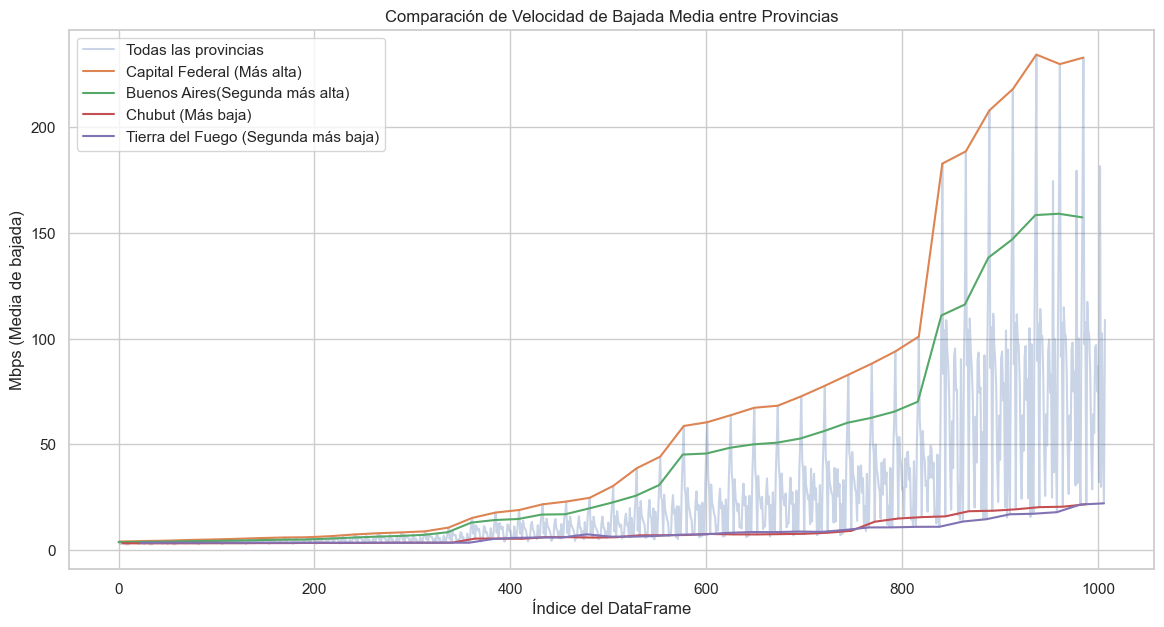

In [39]:
# Se grafica la velocidad de bajada media para todas las provincias
plt.figure(figsize=(14,7))

sns.lineplot(data=df_vel_porc_prov, x=df_vel_porc_prov.index, y="Mbps (Media de bajada)", label="Todas las provincias", alpha=0.3)
sns.lineplot(data=df_max, x=df_max.index, y="Mbps (Media de bajada)", label="Capital Federal (Más alta)")
sns.lineplot(data=df_max2, x=df_max2.index, y="Mbps (Media de bajada)", label="Buenos Aires(Segunda más alta)")
sns.lineplot(data=df_min, x=df_min.index, y="Mbps (Media de bajada)", label="Chubut (Más baja)")
sns.lineplot(data=df_min2, x=df_min2.index, y="Mbps (Media de bajada)", label="Tierra del Fuego (Segunda más baja)")

plt.title("Comparación de Velocidad de Bajada Media entre Provincias")
plt.xlabel("Índice del DataFrame")
plt.ylabel("Mbps (Media de bajada)")
plt.legend()
plt.show()

Se realizan las ultimas transformaciones para visualizar los datos en PowerBI

In [49]:
# Codigo de provincias para visualizacion de archivo SVG en PowerBI
codigo_provincias = {
    "Buenos Aires": "AR-B",
    "Catamarca": "AR-K",
    "Chaco": "AR-H",
    "Chubut": "AR-U",
    "Capital Federal": "AR-C",
    "Córdoba": "AR-X",
    "Corrientes": "AR-W",
    "Entre Ríos": "AR-E",
    "Formosa": "AR-P",
    "Jujuy": "AR-Y",
    "La Pampa": "AR-L",
    "La Rioja": "AR-F",
    "Mendoza": "AR-M",
    "Misiones": "AR-N",
    "Neuquén": "AR-Q",
    "Río Negro": "AR-R",
    "Salta": "AR-A",
    "San Juan": "AR-J",
    "San Luis": "AR-D",
    "Santa Cruz": "AR-Z",
    "Santa Fe": "AR-S",
    "Santiago Del Estero": "AR-G",
    "Tierra Del Fuego": "AR-V",
    "Tucumán": "AR-T"
}

In [ ]:
# Transformaciones para PowerBI

df_vel_porc_prov['Codigo'] = df_vel_porc_prov['Provincia'].map(codigo_provincias) # Se agrega una columna con el codigo de las provincias
df_vel_porc_prov['Fecha'] = pd.to_datetime(df_vel_porc_prov['Año'].astype(str) + '-' + df_vel_porc_prov['Trimestre'].astype(str) + '-01') # Se crea una columna 'Fecha' combinando Año y Trimestre
df_vel_porc_prov = df_vel_porc_prov.drop(columns=["Año", "Trimestre", "Promedio Nacional"]) # Se borran columnas que ya no se necesitan

In [44]:
df_vel_porc_prov.head(4)

,Provincia,Mbps (Media de bajada),Codigo,Fecha
0,Buenos Aires,3.733133,AR-B,2014-01-01
1,Capital Federal,4.024082,AR-C,2014-01-01
2,Catamarca,2.802734,AR-K,2014-01-01
3,Chaco,3.255837,AR-H,2014-01-01


In [ ]:
# Se exporta este dataframe a una hoja de excel
with pd.ExcelWriter('Internet2.xlsx', engine='openpyxl', mode='a') as writer:
    df_vel_porc_prov.to_excel(writer, sheet_name='vel_por_prov', index=False)

# EDA - Tecnologia

El siguiente dataset contiene informacion trimestral sobre los accesos de cada provincia argentina a las tecnologias ADSL, Cablemodem, Fibra optica, Wireless y Otros desde 2014 al segundo trimestre de 2024

In [63]:
df_acc_tec = Internet['Accesos Por Tecnología']
df_acc_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


In [43]:
df_acc_tec.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0


In [64]:
df_acc_tec.loc[(df_acc_tec['Año'] == 2024) & (df_acc_tec['Trimestre'] == 4), ['Año', 'Trimestre']] = [2023, 4] # Se corrigen valores mal ingresados

In [65]:
df_acc_tec = df_acc_tec[df_acc_tec['Año'] != 2024] # Se excluyen los datos de 2024

In [66]:
# Se ordena el dataframe y reinician los indices
df_acc_tec= df_acc_tec.sort_values(by=["Año", "Trimestre"], ascending=[True, True]).reset_index(drop=True)

In [27]:
# Se agrupan los datos por 'Año' y 'Trimestre', sumando los accesos por tecnología
df_agrupado = df_acc_tec.groupby(['Año', 'Trimestre']).agg({
    'ADSL': 'sum',
    'Cablemodem': 'sum',
    'Fibra óptica': 'sum',
    'Wireless': 'sum',
    'Otros': 'sum',
    'Total': 'sum'
}).reset_index()

# Se calculan los porcentajes de cada tecnología con respecto al total
df_agrupado = df_agrupado[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].div(df_agrupado['Total'], axis=0) * 100

In [68]:
df_agrupado.head(3)

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,57.781120,37.623949,2.349385,1.105730,1.139817
1,57.373352,38.080009,2.310523,1.120046,1.116070
2,56.324661,38.965313,2.357659,1.290258,1.062110


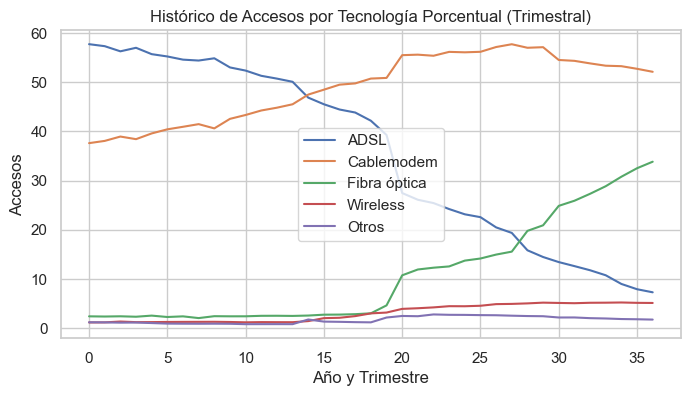

In [30]:
# Se grafica cada tecnologia
plt.figure(figsize=(8, 4)) 
sns.lineplot(data=df_agrupado, x=df_agrupado.index, y='ADSL', label='ADSL')
sns.lineplot(data=df_agrupado, x=df_agrupado.index, y='Cablemodem', label='Cablemodem')
sns.lineplot(data=df_agrupado, x=df_agrupado.index, y='Fibra óptica', label='Fibra óptica')
sns.lineplot(data=df_agrupado, x=df_agrupado.index, y='Wireless', label='Wireless')
sns.lineplot(data=df_agrupado, x=df_agrupado.index, y='Otros', label='Otros')

plt.xlabel('Año y Trimestre')
plt.ylabel('Accesos')
plt.title('Histórico de Accesos por Tecnología Porcentual (Trimestral)')
plt.legend()
plt.show()

A partir del grafico obtenido se puede apreciar el siguiente analisis para cada tecnologia:

- **ADLS:** Ha mostrado una disminucion constante en su porcentaje de accesos a lo largo del tiempo. Esto indica que los usuarios estan migrando de esta tecnologia hacia opciones mas modernas como Fibra optica o Cablemodem.

- **Cablemodem:** Al principio del periodo, experimenta un crecimiento constante, superando al ADSL como la tecnologia dominante. Sin embargo, en los ultimos años, parece haber alcanzado un pico y comenzado una leve declinacion, probablemente debido a la transicion hacia Fibra optica.

- **Fibra optica:** Es la tecnologia con el crecimiento mas rapido y consistente en todo el periodo analizado. Paso de ser marginal a competir directamente con Cablemodem en los ultimos años, reflejando la preferencia del mercado por conexiones mas rapidas y fiables.

- **Wireless:** Se mantiene en un porcentaje bajo y relativamente constante, mostrando poca adopcion como solucion de conectividad masiva.

- **Otros:** Representan una fraccion muy pequeña y estable del total, indicando que estas tecnologias no estan teniendo un impacto significativo.


Se realizan las ultimas transformaciones para visualizar los datos en PowerBI

In [ ]:
df_acc_tec['Codigo'] = df_acc_tec['Provincia'].map(codigo_provincias) # Se agrega una columna con el codigo de las provincias

In [57]:
df_acc_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
 9   Codigo        960 non-null    object 
dtypes: float64(6), object(4)
memory usage: 75.3+ KB


In [ ]:
# Se corrigen los valores de las columnas Año y Trimestre 
df_acc_tec['Año'] = pd.to_numeric(df_acc_tec['Año'], errors='coerce')
df_acc_tec['Trimestre'] = pd.to_numeric(df_acc_tec['Trimestre'], errors='coerce')

df_acc_tec = df_acc_tec.dropna(subset=['Año', 'Trimestre']) 

df_acc_tec['Año'] = df_acc_tec['Año'].astype(int)
df_acc_tec['Trimestre'] = df_acc_tec['Trimestre'].astype(int)

In [ ]:
# Se agrega una columna con la fecha en tipo date
df_acc_tec['Fecha'] = pd.to_datetime(
    df_acc_tec['Año'].astype(int).astype(str) + '-' +
    df_acc_tec['Trimestre'].astype(int).astype(str) + '-01',
    errors='coerce')

df_acc_tec = df_acc_tec.drop(columns=["Año", "Trimestre"]) # Se borran columnas que ya no se necesitan

In [61]:
df_acc_tec.head(3)

,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Codigo,Fecha
0,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0,AR-B,2014-01-01
1,Capital Federal,445569.0,820161.0,17767.0,1866.0,14555.0,1299918.0,AR-C,2014-01-01
2,Catamarca,24126.0,46.0,17.0,0.0,43.0,24232.0,AR-K,2014-01-01


In [62]:
# Se exporta este dataframe a una hoja de excel
with pd.ExcelWriter('Internet2.xlsx', engine='openpyxl', mode='a') as writer:
    df_acc_tec.to_excel(writer, sheet_name='acc_tec', index=False)

## EDA - Penetracion por Hogar y Tecnologia

Los siguientes datasets continen informacion trimestral sobre la cantidad de accesos por cada 100 hogares y la cantidad de accesos por cada 100 habitantes de cada provincia durante 2014 hasta el segundo trimestre de 2024

In [70]:
df_pen_pob = Internet['Penetración-poblacion']
df_pen_hog = Internet['Penetracion-hogares']

In [71]:
# Se observa la informacion de ambos dataframes
print(df_pen_hog.info())
print(df_pen_pob.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1

In [72]:
print(df_pen_pob.head(3))
print(df_pen_hog.head(3))

    Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
    Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37
2  2024          2        Catamarca                         68.81


In [75]:
# Se unen ambos datasets 
df_pen= pd.concat([df_pen_pob, df_pen_hog["Accesos por cada 100 hogares"]], axis=1)

# Se agregan dos columnas con el total de accesos en cada trimestre
# Esto es para obtener el comportamiento del pais en general
df_pen['Total por cada 100 hab (Nacional)'] = df_pen.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hab'].transform('mean').round(2)
df_pen['Total por cada 100 hogares (Nacional)'] = df_pen.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hogares'].transform('mean').round(2)

df_pen.head(4)

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares,Total por cada 100 hab (Nacional),Total por cada 100 hogares (Nacional)
0,2024,2,Buenos Aires,27.43,79.84,21.25,71.92
1,2024,2,Capital Federal,47.44,116.37,21.25,71.92
2,2024,2,Catamarca,17.50,68.81,21.25,71.92
3,2024,2,Chaco,11.78,44.06,21.25,71.92


In [76]:
df_pen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Año                                    1000 non-null   int64  
 1   Trimestre                              1000 non-null   int64  
 2   Provincia                              1000 non-null   object 
 3   Accesos por cada 100 hab               1000 non-null   float64
 4   Accesos por cada 100 hogares           1000 non-null   float64
 5   Total por cada 100 hab (Nacional)      1000 non-null   float64
 6   Total por cada 100 hogares (Nacional)  1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [77]:
# Se ordena el dataframe y reinician los indices
df_pen= df_pen.sort_values(by=["Año", "Trimestre"], ascending=[True, True]).reset_index(drop=True)

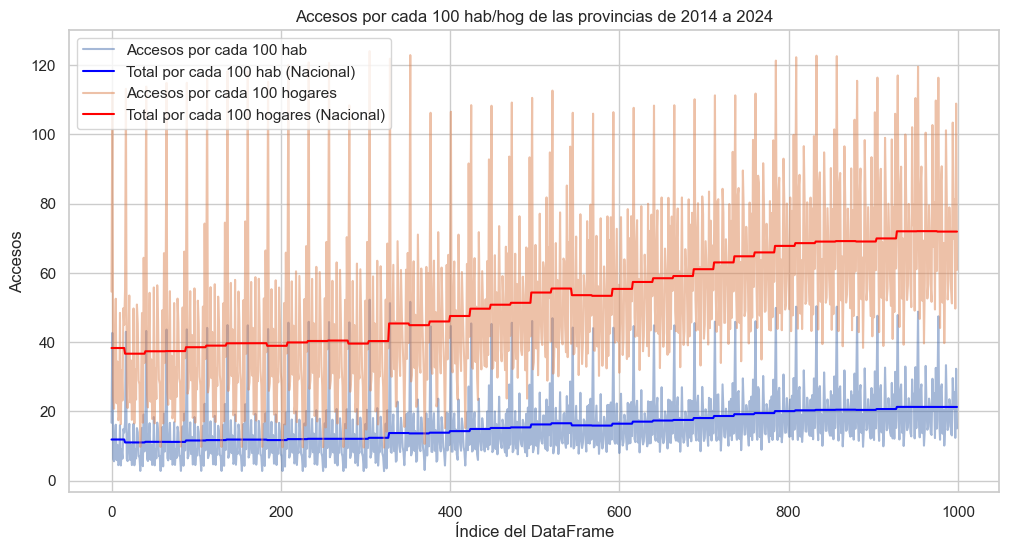

In [95]:
# Se grafica los accesos por cada 100 hab y por cada 100 hog de todas las provincias
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_pen, x=df_pen.index, y="Accesos por cada 100 hab", label="Accesos por cada 100 hab", alpha=0.5)
sns.lineplot(data=df_pen, x=df_pen.index, y="Total por cada 100 hab (Nacional)", label="Total por cada 100 hab (Nacional)", color='blue')
sns.lineplot(data=df_pen, x=df_pen.index, y="Accesos por cada 100 hogares", label="Accesos por cada 100 hogares", alpha=0.5)
sns.lineplot(data=df_pen, x=df_pen.index, y="Total por cada 100 hogares (Nacional)", label="Total por cada 100 hogares (Nacional)", color='red')

plt.title("Accesos por cada 100 hab/hog de las provincias de 2014 a 2024")
plt.xlabel("Índice del DataFrame")
plt.ylabel("Accesos")
plt.legend()
plt.show()

- Las líneas azules y rojas representan los promedios nacionales. Se observa un crecimiento paulatino en ambos indicadores a lo largo de los años.

- Las bandas de color (azul claro y anaranjado) representan la dispersión de los valores provinciales. Las fluctuaciones son mayores para los accesos por hogar que por habitante

- Los picos y valles dentro de las bandas de dispersión indican que algunas provincias tienen un acceso significativamente superior o inferior al promedio nacional. Esto podría deberse a factores como el nivel de urbanización, infraestructura tecnológica o capacidad económica de las provincias.

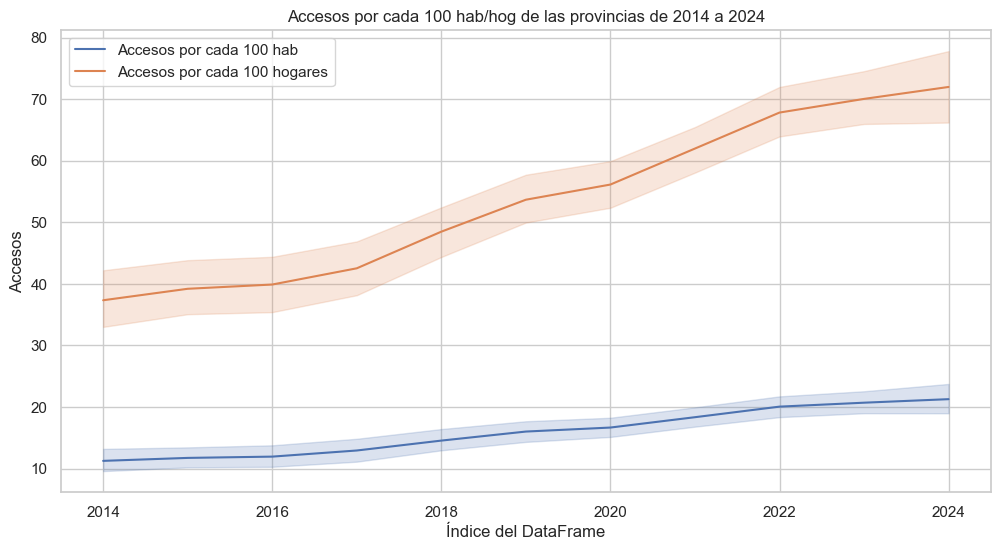

In [81]:
# Se grafica los accesos por cada 100 hab y por cada 100 hog de todas las provincias
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_pen, x="Año", y="Accesos por cada 100 hab", label="Accesos por cada 100 hab")
sns.lineplot(data=df_pen, x="Año", y="Accesos por cada 100 hogares", label="Accesos por cada 100 hogares")

plt.title("Accesos por cada 100 hab/hog de las provincias de 2014 a 2024")
plt.xlabel("Índice del DataFrame")
plt.ylabel("Accesos")
plt.legend()
plt.show()

Se puede observar como la dispersion, entre las provincias, de los accesos por cada 100 habitantes es menor a la dispersion si tomamos en cuenta los accesos por cada 100 hogares. Tambien es posible observar como estas variaciones respecto a la media se han mantenido constantes en el tiempo

In [83]:
df_pen.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares,Total por cada 100 hab (Nacional),Total por cada 100 hogares (Nacional)
0,2014,1,Buenos Aires,16.692346,54.570073,11.85,38.28
1,2014,1,Capital Federal,42.655072,112.254123,11.85,38.28
2,2014,1,Catamarca,6.184615,24.251751,11.85,38.28


A continuacion se obtienen las provincias con mayor y menor cantidad de accesos por cada 100 habitantes y por cada 100 hogares

In [100]:
# Filtrar por el segundo trimestre del año 2024
df_filtrado = df_pen[(df_pen["Año"] == 2023) & (df_pen["Trimestre"] == 4)]

hab_top_3 = df_filtrado.nlargest(3, "Accesos por cada 100 hab") # Obtener las 3 provincias con mayor cant de accesos por cada 100 hab
hab_bottom_3 = df_filtrado.nsmallest(3, "Accesos por cada 100 hab") # Obtener las 3 provincias con menor cant de accesos por cada 100 hab

hog_top_3 = df_filtrado.nlargest(3, "Accesos por cada 100 hogares") # Obtener las 3 provincias con mayor cant de accesos por cada 100 hog
hog_bottom_3 = df_filtrado.nsmallest(3, "Accesos por cada 100 hogares") # Obtener las 3 provincias con menor cant de accesos por cada 100 hog


In [101]:
# Se muestran las provincias obtenidas
print(hab_top_3[["Provincia", "Accesos por cada 100 hab"]])
print(hab_bottom_3[["Provincia", "Accesos por cada 100 hab"]])
print("---------------------------------------------------------------")
print(hog_top_3[["Provincia", "Accesos por cada 100 hogares"]])
print(hog_bottom_3[["Provincia", "Accesos por cada 100 hogares"]])

            Provincia  Accesos por cada 100 hab
929   Capital Federal                     47.80
938          La Pampa                     32.93
950  Tierra Del Fuego                     32.75
               Provincia  Accesos por cada 100 hab
936              Formosa                      9.98
931                Chaco                     11.85
949  Santiago Del Estero                     12.18
---------------------------------------------------------------
            Provincia  Accesos por cada 100 hogares
929   Capital Federal                        117.02
950  Tierra Del Fuego                        110.49
946          San Luis                        102.07
               Provincia  Accesos por cada 100 hogares
936              Formosa                         39.23
931                Chaco                         44.35
949  Santiago Del Estero                         49.08


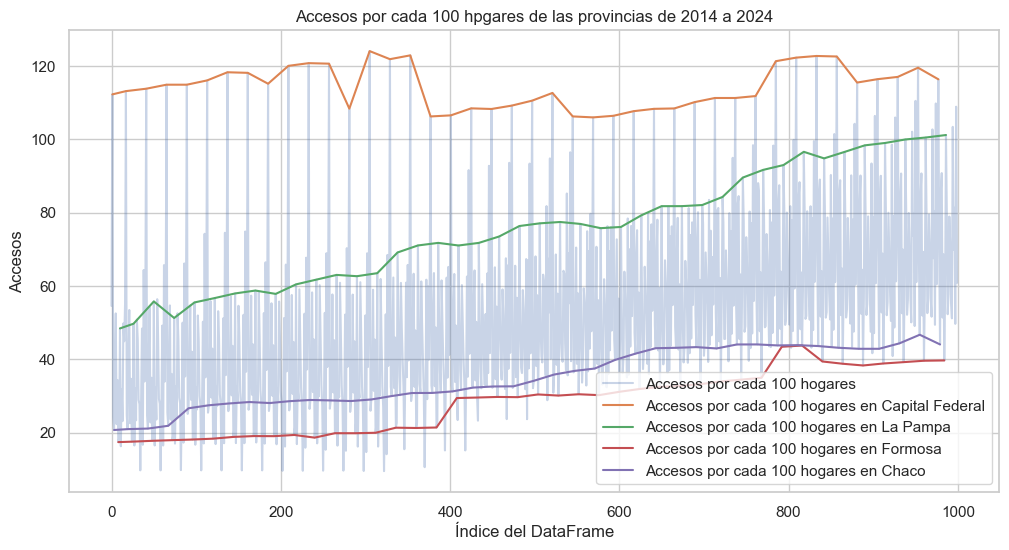

In [105]:
plt.figure(figsize=(12, 6))

df_CF = df_pen[df_pen["Provincia"] == "Capital Federal"]
df_LP = df_pen[df_pen["Provincia"] == "La Pampa"]
df_FM = df_pen[df_pen["Provincia"] == "Formosa"]
df_CH = df_pen[df_pen["Provincia"] == "Chaco"]

sns.lineplot(data=df_pen, x=df_pen.index, y="Accesos por cada 100 hogares", label="Accesos por cada 100 hogares", alpha=0.3)
sns.lineplot(data=df_CF, x=df_CF.index, y="Accesos por cada 100 hogares", label="Accesos por cada 100 hogares en Capital Federal")
sns.lineplot(data=df_LP, x=df_LP.index, y="Accesos por cada 100 hogares", label="Accesos por cada 100 hogares en La Pampa")
sns.lineplot(data=df_FM, x=df_FM.index, y="Accesos por cada 100 hogares", label="Accesos por cada 100 hogares en Formosa")
sns.lineplot(data=df_CH, x=df_CH.index, y="Accesos por cada 100 hogares", label="Accesos por cada 100 hogares en Chaco")

plt.title("Accesos por cada 100 hpgares de las provincias de 2014 a 2024")
plt.xlabel("Índice del DataFrame")
plt.ylabel("Accesos")
plt.legend()
plt.show()

# EDA - Accesos por rango

In [106]:
df_acc_rango = Internet['Accesos por rangos']

In [107]:
df_acc_rango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


In [108]:
count_zeros = (df_acc_rango == 0).sum()
print(count_zeros)

Año                      0
Trimestre                0
Provincia                0
HASTA 512 kbps           0
+ 512 Kbps - 1 Mbps     50
+ 1 Mbps - 6 Mbps        0
+ 6 Mbps - 10 Mbps      36
+ 10 Mbps - 20 Mbps     69
+ 20 Mbps - 30 Mbps     98
+ 30 Mbps              106
OTROS                  459
Total                    0
dtype: int64


In [109]:
df_acc_rango.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0


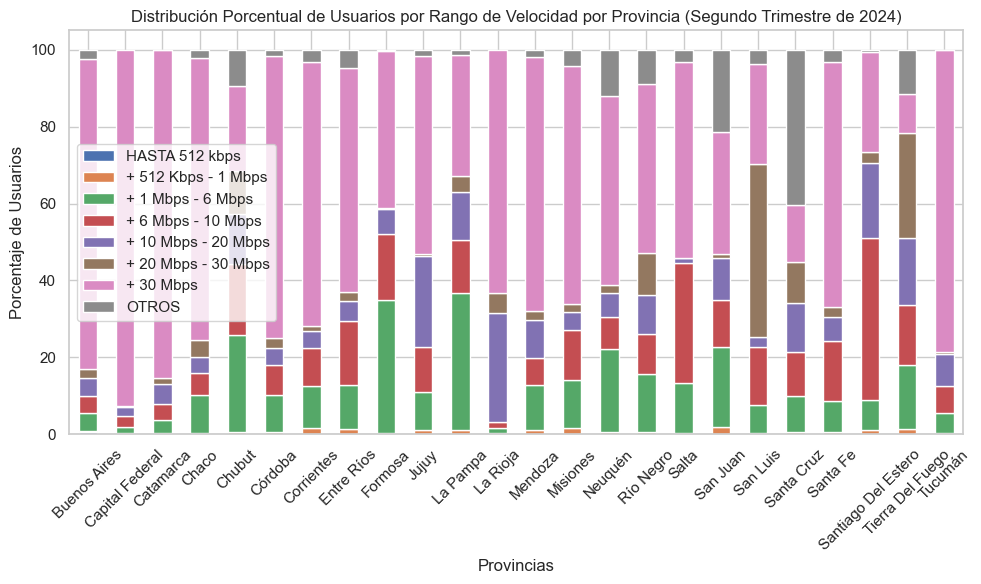

In [ ]:
# Se filtran los datos para el año 2024 y el segundo trimestre
df_filtered = df_acc_rango[df_acc_rango['Año'] == 2024]
df_filtered = df_filtered[df_filtered['Trimestre'] == 2]

# Se definen las columnas para los rangos de velocidad
speed_columns = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
    '+ 30 Mbps', 'OTROS'
]

# Se calculan los porcentajes para cada rango de velocidad respecto al total
df_percentage = df_filtered[speed_columns].div(df_filtered['Total'], axis=0) * 100

# Se crea el gráfico de barras apiladas con porcentajes
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_ylabel('Porcentaje de Usuarios')
ax.set_xlabel('Provincias')
ax.set_title('Distribución Porcentual de Usuarios por Rango de Velocidad por Provincia (Segundo Trimestre de 2024)')
ax.set_xticklabels(df_filtered['Provincia'], rotation=45)

plt.tight_layout()
plt.show()

Se puede observar que velocidad es mas frecuente para cada provincia

# EDA - Ingresos

In [78]:
df_ingresos = Internet['Ingresos ']

In [4]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [113]:
df_ingresos.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023


In [83]:
# TRANSFORMACIONES

df_ingresos['Año'] = df_ingresos['Año'].replace(2033, 2023) # Se corrige un dato
df_ingresos= df_ingresos.sort_values(by=["Año", "Trimestre"], ascending=[True, True]).reset_index(drop=True) # Se ordena el dataframe y reinician los indices
df_ingresos = df_ingresos[df_ingresos['Año'] != 2024] # Se toman los años de 2014 - 2023

C:\Users\Jose Quispe}\AppData\Local\Temp\ipykernel_3628\973839591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Año'] = df_ingresos['Año'].replace(2033, 2023) # Se corrige un dato


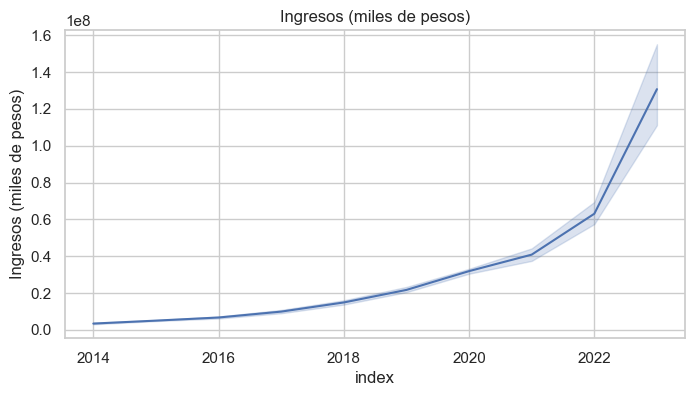

In [14]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_ingresos, x = "Año", y="Ingresos (miles de pesos)")
plt.title("Ingresos (miles de pesos)")
plt.xlabel("index")
plt.ylabel("Ingresos (miles de pesos)")
plt.show()

Los ingresos nominales (sin ajustar por inflación) pueden no reflejar el verdadero comportamiento del mercado. Ajustar por inflación elimina el efecto del aumento generalizado de precios, mostrando cuánto realmente "valen" esos ingresos en términos constantes. En este contexto un grafico ajustado por inflación ayuda a identificar periodos de crecimiento o estancamiento economico reales para este sector, incluso en entornos inflacionarios...

A continuacion se presenta un ajuste por inflacion tomando como referencia el anio 2014

In [86]:
# Datos de inflacion acumulada de los anios 2014 a 2023, tomando como base el 2014
inflacion_acumulada = {
    2023: 7142.58,  # Inflacion acumulada de 2023 a 2014
    2022: 2295.62,  # Inflacion acumulada de 2022 a 2014 
    2021: 1178.45, # Inflacion acumulada de 2021 a 2014
    2020: 780.95,  # Inflacion acumulada de 2020 a 2014
    2019: 573.59,  # Inflacion acumulada de 2019 a 2014
    2018: 372.95,  # Inflacion acumulada de 2018 a 2014
    2017: 252.59,  # Inflacion acumulada de 2017 a 2014
    2016: 202.39,  # Inflacion acumulada de 2016 a 2014
    2015: 150.36, # Infalcion acumulada de 2015 a 2014
    2014: 28.3    # Inflacion anual de 2014
}
# Se ajustan los ingresos por inflacion (suponiendo que 2014 es el anio base)
def ajustar_por_inflacion(columna, inflacion, anio_base=2014):
    anio = columna['Año']
    inflacion_base = inflacion[anio_base] 
    inflacion_anio = inflacion[anio]  
    return columna['Ingresos (miles de pesos)'] * (inflacion_base / inflacion_anio)

In [87]:
# Se aniade una columna con los valores ajustados por inflacion
df_ingresos['Ingresos ajustados por Inflacion'] = df_ingresos.apply(ajustar_por_inflacion, axis=1, inflacion=inflacion_acumulada)

In [62]:
df_ingresos.head(6)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos ajustados por Inflacion
0,2014,1,2.984054e+06,Ene-Mar 2014,2.984054e+06
1,2014,2,3.270816e+06,Abr-Jun 2014,3.270816e+06
2,2014,3,3.478638e+06,Jul-Sept 2014,3.478638e+06
3,2014,4,3.950441e+06,Oct-Dic 2014,3.950441e+06
4,2015,1,4.876385e+06,Ene-Mar 2015,9.178086e+05
5,2015,2,4.701791e+06,Abr-Jun 2015,8.849473e+05


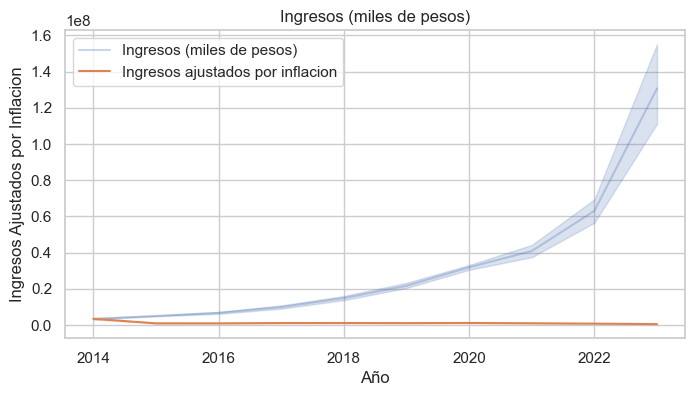

In [ ]:
"""plt.figure(figsize=(8,4))
sns.lineplot(data=df_ingresos, x = "Año" , y="Ingresos (miles de pesos)", label="Ingresos (miles de pesos)", alpha=0.3)
sns.lineplot(data=df_ingresos, x = "Año" , y="Ingresos ajustados por Inflacion", label="Ingresos ajustados por inflacion")
plt.title("Ingresos (miles de pesos)")
plt.xlabel("Año")
plt.ylabel("Ingresos Ajustados por Inflacion")
plt.show()"""